In [262]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/adaptive-signal-processing
    from os import chdir as cd
    cd('/content/notebooks/')
    ! pip install -e .
    ! pip install SciencePlots

import sympy as sp
from sympy import latex
import numpy as np
from IPython.display import Math, Latex, display
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [263]:
from IPython.core.display import HTML
from IPython.display import Image
import scienceplots
from utils import set_preferences, genConvGIF, symdisp, round_expr

plt.style.use(['science','ieee'])
set_preferences()

plt.rcParams['figure.figsize'] = [5, 2.5]
plt.rcParams['figure.dpi'] = 150

saveFigures = True
figurePath = 'G:\\Meu Drive\\DEE UFCG\\Disciplinas e ementas\\TEEE - Processamento adaptativo de sinais\\lecture notes\\figures\\'

# Adaptive Filtering Fundamentals

### Newton's Method for Optimization

**Overview:**
Newton's method is an iterative technique used to find the local maximum or minimum of a differentiable function. It leverages both the first and second derivatives (i.e., the gradient and Hessian) to achieve faster convergence compared to methods that only use the gradient, like gradient descent.

**Mathematical Foundation:**

For a twice-differentiable function $f(\mathbf{x})$, Newton's method uses a second-order Taylor series approximation around a point $\mathbf{x}_k$:

$$
f(\mathbf{x}) \approx f(\mathbf{x}_k) + \nabla f(\mathbf{x}_k)^\top (\mathbf{x} - \mathbf{x}_k) + \frac{1}{2} (\mathbf{x} - \mathbf{x}_k)^\top \nabla^2 f(\mathbf{x}_k) (\mathbf{x} - \mathbf{x}_k)
$$

Here:
- $\nabla f(\mathbf{x}_k)$ is the gradient of $f$ at $\mathbf{x}_k$.
- $\nabla^2 f(\mathbf{x}_k)$ is the Hessian matrix of $f$ at $\mathbf{x}_k$.

The goal is to find the point $\mathbf{x}_{k+1}$ where the gradient of $f(\mathbf{x})$ is zero, indicating a local extremum.

**Iteration Update:**
Newton's method updates the point $\mathbf{x}_k$ using the following rule:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \mathbf{H}_f^{-1}(\mathbf{x}_k) \nabla f(\mathbf{x}_k)
$$

Where:
- $\mathbf{H}_f(\mathbf{x}_k)$ is the Hessian matrix at $\mathbf{x}_k$.
- $\mathbf{H}_f^{-1}(\mathbf{x}_k)$ is the inverse of the Hessian matrix.
- $\nabla f(\mathbf{x}_k)$ is the gradient at $\mathbf{x}_k$.

**Interpretation:**
- **Gradient** $\nabla f(\mathbf{x}_k)$: Points in the direction of steepest ascent.
- **Hessian** $\mathbf{H}_f(\mathbf{x}_k)$: Provides curvature information, allowing the method to adjust step sizes based on the landscape of the function.

**Convergence:**
- **Quadratic Convergence:** When close to a local optimum and assuming the Hessian is positive definite, Newton's method has quadratic convergence, meaning the error decreases exponentially.
- **Potential Issues:** If the Hessian is not positive definite, the method may converge to a saddle point instead of a minimum. Additionally, calculating and inverting the Hessian can be computationally expensive for large problems.

**Application:**
Newton's method is effective for optimization problems where the function is well-behaved (i.e., smooth, with a well-defined second derivative). It is particularly useful in machine learning, physics, and engineering applications where precision is critical.

### Example:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Convergence achieved after 11 iterations.
Minimum value of f(x) = f(-1.673) = 8.024


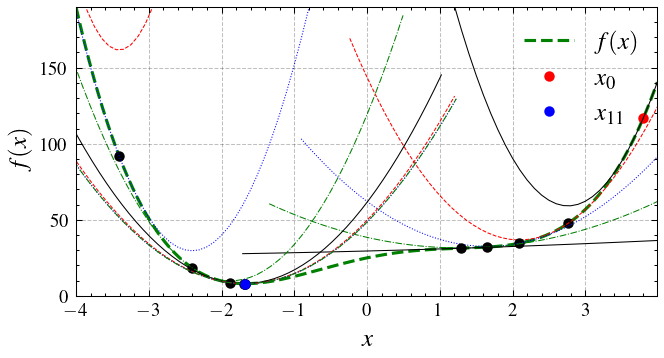

In [264]:
x, u = sp.symbols('x, Δx', real=True)

# Objective function
f = 0.8*x**4 -x**3 - 4*x**2 + 10*x + 25 
#f = 4*x**2 + 10*x + 25 
symdisp('f(x) = ', f)

# Calculate derivatives
dfdx = sp.diff(f,x)
d2fdx2 = sp.diff(dfdx,x)
symdisp('\\frac{df(x)}{dx} = ', dfdx)
symdisp('\\frac{d^2f(x)}{dx^2} = ', d2fdx2)

# lambdify to simplify numerical calculations
f_lamb = sp.lambdify(x, f)
df_lamb = sp.lambdify(x, dfdx)
d2f_lamb = sp.lambdify(x, d2fdx2)

domain = np.arange(-4, 4, 0.01)
y = f_lamb(domain)
plt.plot(domain, y,'--g', linewidth=1.5, label='$f(x)$')

# Find extreme points of f(x) using Newton's method

# Parameters
μ = 1                 # step size
x0 = 3.8              # initial guess
max_iterations = 50   # maximum number of iterations
tol = 1e-4            # absolute tolerance

domain_approx = np.arange(-3,3,0.1)  

# Run iterations of Newton's algorithm
xk = x0
for k in range(max_iterations):
    symdisp(f'iteration\;{k}: x_k = {xk:.3f}', )
        
    if k == 0:
        plt.plot(xk, f_lamb(xk),'ro', markersize=4, label='$x_0$')
    elif k == max_iterations-1:
        plt.plot(xk, f_lamb(xk),'bo', markersize=4, label=f'$x_{k}$')
    else:
        plt.plot(xk, f_lamb(xk),'ko', markersize=4)        
    
    # approximate f(x) with a quadratic function (parabola) around xk
    f_approx = f_lamb(xk) + df_lamb(xk)*u + (1/2)*d2f_lamb(xk)*u**2 
    symdisp(f'f({xk:.3f} + Δx) = ', f_approx, numDig=4)
    
    # plot approximation at iteration k
    f_approx_lamb = sp.lambdify(u, f_approx)    
    plt.plot(domain_approx+xk, f_approx_lamb(domain_approx))
        
    xk_ = xk # save previous xk value
    
    # Newton's algorithm update:
    xk -= μ*df_lamb(xk)/d2f_lamb(xk)   
    
    # Verify convergence of the algorithm
    if np.abs(xk-xk_) < tol:
        print(f'Convergence achieved after {k} iterations.')
        plt.plot(xk, f_lamb(xk),'bo', markersize=4, label=f'$x_{{{k}}}$')
        print(f'Minimum value of f(x) = f({xk:.3f}) = {f_lamb(xk):.3f}')
        break # Stop iterations if tolerance is met
        

plt.ylim(0, y.max())
plt.xlim(domain.min(), domain.max())
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.ylabel('$f(x)$');    

if saveFigures:
    plt.savefig(figurePath + 'Newton_method_1D_example.png', dpi=600)

In [265]:
x, y, Δx = sp.symbols('x, y, Δx', real=True)

def gradient(f):
    return sp.Matrix([[f.diff(x)],[f.diff(y)]])

# Objective function
f = (4*x**2 + 10*x + 25) + (0.2*y**4 -0.7*y**3 - 4*y**2 + 10*y + 25) + 0.1*x*y

#f = x**2 + y**2 

f_lamb = sp.lambdify((x, y), f)

domain = np.arange(-5, 5, 0.1)

x_domain, y_domain = np.meshgrid(domain, domain)

z = f_lamb(x_domain, y_domain)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Reached max iterations.
Minimum value of f(x) = f(-1.186,-2.732) = 12.331


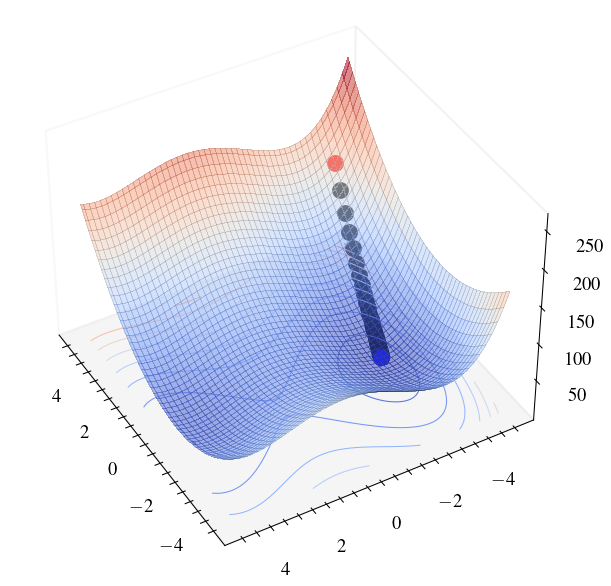

In [266]:
fig = plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')

# Plot the surface.
ax.plot_surface(x_domain, y_domain, z, cmap=cm.coolwarm, alpha=0.55, linewidth=0.05, antialiased=False)
ax.contour(x_domain, y_domain, z, 10, cmap=cm.coolwarm, linestyles="solid", offset=-2)
#ax.contour(x_domain, y_domain, z, 10, colors="k", linestyles="dashed")

# Make panes transparent
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane

wire = ax.plot_wireframe(x_domain, y_domain, z,color='k',linewidth=0.05)
fig.tight_layout()
ax.grid(False)


# Calculate derivatives
grad = gradient(f)
hess = sp.hessian(f, [x, y])

# lambdify to simplify numerical calculations
grad_lamb = sp.lambdify((x,y), grad)
hess_lamb = sp.lambdify((x,y), hess)

# Find extreme points of f(x) using Newton's method

# Parameters
μ = 0.1                       # step size
x0 = np.array([[4.0], [-4.0]])  # initial guess
max_iterations = 50         # maximum number of iterations
tol = 1e-3                  # absolute tolerance

# Run iterations of Newton's algorithm
xk = x0
for k in range(max_iterations):
    symdisp(f'iteration\;{k}: x_k = {xk[0][0]:.3f}, y_k = {xk[1][0]:.3f}', )        
    if k == 0:
        ax.scatter(xk[0], xk[1], f_lamb(xk[0],xk[1]),color='r', s=50, label='$x_0$')        
    elif k == max_iterations-1:
        print(f'Reached max iterations.')
        ax.scatter(xk[0], xk[1], f_lamb(xk[0],xk[1]),color='b', s=50, label=f'$x_{k}$')
        print(f'Minimum value of f(x) = f({xk[0][0]:.3f},{xk[1][0]:.3f}) = {f_lamb(xk[0][0],xk[1][0]):.3f}')
    else:
        ax.scatter(xk[0], xk[1], f_lamb(xk[0],xk[1]),color='k', s=50, label='$x_{k}$')     
                      
    xk_ = xk.copy() # save previous xk value
    
    # Newton's algorithm update:    
    xk -= μ*np.linalg.inv(hess_lamb(xk[0][0],xk[1][0]))@grad_lamb(xk[0],xk[1])[:,:,0]
    
    # Verify convergence of the algorithm
    if np.sum(np.abs(xk-xk_)) < tol:
        print(f'Convergence achieved after {k} iterations.')
        ax.scatter(xk[0], xk[1], f_lamb(xk[0],xk[1]),color='b', s=50, label=f'$x_{k}$')
        print(f'Minimum value of f(x) = f({xk[0][0]:.3f},{xk[1][0]:.3f}) = {f_lamb(xk[0][0],xk[1][0]):.3f}')
        break # Stop iterations if tolerance is met

ax.view_init(elev=40., azim=150)
plt.show()